In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_56217_G')

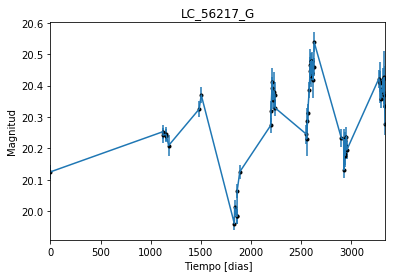

In [2]:
data = np.genfromtxt('LC_56217_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_56217_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

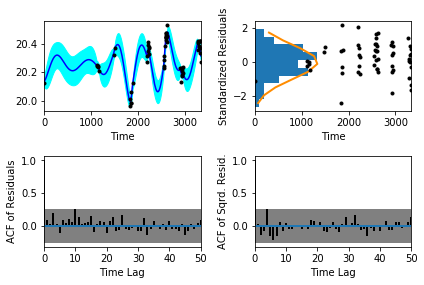

In [5]:
sample.assess_fit()

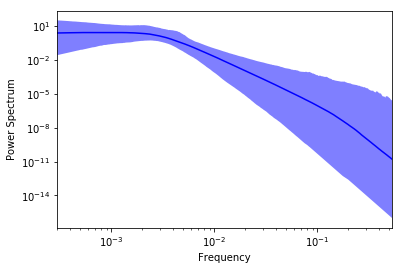

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_56217_G')

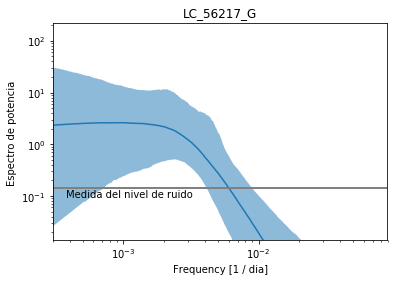

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_56217_G')

Text(0.5,1,'Prediccion , valor esperado LC_56217_G')

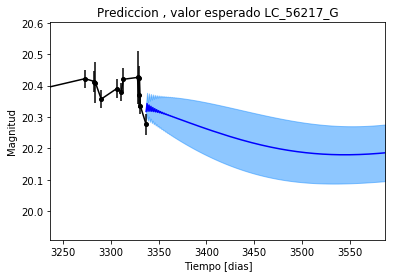

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_56217_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_56217_G')

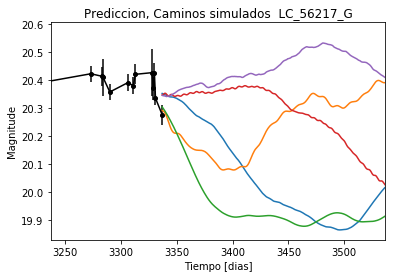

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_56217_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_56217_G')

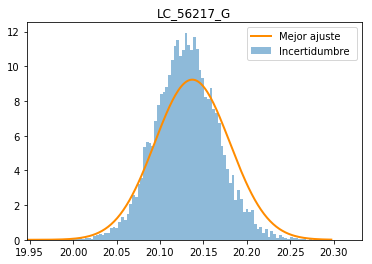

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_56217_G')

Text(0.5,1,'Interpolacion, camino simulado LC_56217_G')

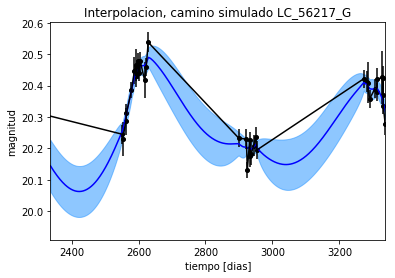

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56217_G')

Text(0.5,1,'Interpolacion, camino simulado LC_56217_G')

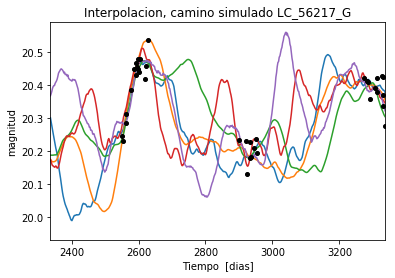

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56217_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 567.372626471
Median: 0.00451067965962
Standard deviation: 0.162790596345
68% credibility interval: [ 0.00071877  0.09862128]
95% credibility interval: [  3.49382038e-04   6.18288335e-01]
99% credibility interval: [  3.07425276e-04   9.26361149e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 575.474674871
Median: 0.0023104017619
Standard deviation: 0.10879080828
68% credibility interval: [ 0.00061269  0.03292345]
95% credibility interval: [  3.38930983e-04   4.05103034e-01]
99% credibility interval: [  3.06866998e-04   7.25844840e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 460.713524614
Median: 0.00458317419843


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1194.55829968
Median: 114.844087656
Standard deviation: 1.75435184063
68% credibility interval: [ 112.9135933   116.19727038]
95% credibility interval: [ 110.25225343  117.04927949]
99% credibility interval: [ 108.30465641  117.8479754 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 577.745842788
Median: 0.302703937807
Standard deviation: 2.07225997685
68% credibility interval: [ 0.04091415  3.11109945]
95% credibility interval: [ 0.01546561  7.10562228]
99% credibility interval: [  0.01155119  10.1867731 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 397.449147601
Median: 0.33610183836
Standard deviation: 10.0977104966
68% credibility interval: [  8.24929979e-03   9.57887693e+00]
95% credibility interval: [  9.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 500.864820969
Median: 6.6966601752e-23
Standard deviation: 5.37085469485e+60
68% credibility interval: [  2.74718518e-76   2.27475400e+15]
95% credibility interval: [  2.18609405e-143   1.40342106e+033]
99% credibility interval: [  4.87449010e-154   8.77114952e+054]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3252.64034101
Median: 20.2515494822
Standard deviation: 0.0545544977976
68% credibility interval: [ 20.20400816  20.29556923]
95% credibility interval: [ 20.1380404   20.35250068]
99% credibility interval: [ 20.06962969  20.42001677]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 628.81536349
Median: 0.019163532836
Standard deviation: 0.263160057199
68% credibility interval: [ 0.          0.41158983]
95% credibility interval: [ 0.          0.93206078]
99% credibility interval: [ 0.          1.05117639]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 628.81536349
Median: 0.019163532836
Standard deviation: 0.263160057199
68% credibility interval: [ 0.          0.41158983]
95% credibility interval: [ 0.          0.93206078]
99% credibility interval: [ 0.          1.05117639]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 558.647719278
Median: 0.0
Standard deviation: 0.00135698853081
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1194.55829968
Median: 114.844087656
Standard deviation: 1.75435184063
68% credibility interval: [ 112.9135933   116.19727038]
95% credibility interval: [ 110.25225343  117.04927949]
99% credibility interval: [ 108.30465641  117.8479754 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2105.88779372
Median: 0.0209715126328
Standard deviation: 0.019311407954
68% credibility interval: [ 0.01329516  0.03620533]
95% credibility interval: [ 0.00912302  0.07370335]
99% credibility interval: [ 0.0072421  0.1253811]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1355.37531943
Median: 1.06164121159
Standard deviation: 0.174276196909
68% credibility interval: [ 0.90063925  1.24004465]
95% credibility interval: [ 0.77030969  1.45297588]
99% credibility interval: [ 0.69750794  1.62734211]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1452.38486823
Median: 0.000146530578224
Standard deviation: 0.092410573043
68% credibility interval: [  3.02715741e-20   5.42606254e-03]
95% credibility interval: [  9.44967431e-38   3.81538842e-02]
99% credibility interval: [  5.01794309e-60   2.12641191e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 567.372626471
Median: (-0.0283414361627+0j)
Standard deviation: 1.94427779933
68% credibility interval: [-0.61965580-0.74886113j -0.00451616-1.24814253j]
95% credibility interval: [ -3.88482018e+00-0.15027441j  -2.19523209e-03-0.02813663j]
99% credibility interval: [ -5.82049876e+00-6.08828376j  -1.93160998e-03-0.56182755j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 575.474674871
Median: (-0.014516682404+0.0120651692247j)
Standard deviation: 1.78920423976
68% credibility interval: [-0.20686411+2.30482004j -0.00384962+0.01543034j]
95% credibility interval: [ -2.54533743e+00+1.38510689j  -2.12956617e-03+0.48559408j]
99% credibility interval: [ -4.56061764e+00+4.07047846j  -1.92810222e-03+0.52207461j]
Posterior summa